<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.570136,81.838732,50.367762,0.000642,186.777273,186.776534,0.000739
1,0.0,1.0,57.146414,38.381855,74.660995,0.005767,180.195032,180.188435,0.006597
2,0.0,2.0,20.930174,70.710355,72.288682,0.004545,173.933756,173.928325,0.005432
3,0.0,3.0,39.576085,32.040192,55.783393,-0.010028,137.389642,137.398819,-0.009177
4,0.0,4.0,69.347854,88.002013,53.296941,0.000041,220.646850,220.647073,-0.000223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.635509,62.046174,82.589846,0.001073,192.272601,192.271108,0.001493
119996,999.0,116.0,73.475154,26.372398,96.979367,-0.013169,206.813750,206.824361,-0.010611
119997,999.0,117.0,72.766388,69.033677,73.912277,0.002373,225.714716,225.711925,0.002791
119998,999.0,118.0,78.616828,60.716997,99.347285,0.001317,248.682427,248.679751,0.002676


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.570136,81.838732,50.367762,0.000642,186.777273,186.776534,0.000739
1,0.0,1.0,57.146414,38.381855,74.660995,0.005767,180.195032,180.188435,0.006597
2,0.0,2.0,20.930174,70.710355,72.288682,0.004545,173.933756,173.928325,0.005432
3,0.0,3.0,39.576085,32.040192,55.783393,-0.010028,137.389642,137.398819,-0.009177
4,0.0,4.0,69.347854,88.002013,53.296941,0.000041,220.646850,220.647073,-0.000223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.635509,62.046174,82.589846,0.001073,192.272601,192.271108,0.001493
119996,999.0,116.0,73.475154,26.372398,96.979367,-0.013169,206.813750,206.824361,-0.010611
119997,999.0,117.0,72.766388,69.033677,73.912277,0.002373,225.714716,225.711925,0.002791
119998,999.0,118.0,78.616828,60.716997,99.347285,0.001317,248.682427,248.679751,0.002676


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.570136  81.838732  50.367762  0.000642  186.777273   
      1.0    57.146414  38.381855  74.660995  0.005767  180.195032   
      2.0    20.930174  70.710355  72.288682  0.004545  173.933756   
      3.0    39.576085  32.040192  55.783393 -0.010028  137.389642   
      4.0    69.347854  88.002013  53.296941  0.000041  220.646850   
...                ...        ...        ...       ...         ...   
999.0 115.0  37.635509  62.046174  82.589846  0.001073  192.272601   
      116.0  73.475154  26.372398  96.979367 -0.013169  206.813750   
      117.0  72.766388  69.033677  73.912277  0.002373  225.714716   
      118.0  78.616828  60.716997  99.347285  0.001317  248.682427   
      119.0  21.063820  71.885879  71.259803 -0.000162  174.209340   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.776534  0.000739  
      1.0    180.188435  0.006597  
      2.0    173.928325  0.005432  
      3.0    137.398819 -0.009177  
      4.0    220.647073 -0.000223  
...                 ...       ...  
999.0 115.0  192.271108  0.001493  
      116.0  206.824361 -0.010611  
      117.0  225.711925  0.002791  
      118.0  248.679751  0.002676  
      119.0  174.209916 -0.000576  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.570136  81.838732  50.367762  0.000642  186.777273   
      1.0    57.146414  38.381855  74.660995  0.005767  180.195032   
      2.0    20.930174  70.710355  72.288682  0.004545  173.933756   
      3.0    39.576085  32.040192  55.783393 -0.010028  137.389642   
      4.0    69.347854  88.002013  53.296941  0.000041  220.646850   
...                ...        ...        ...       ...         ...   
999.0 115.0  37.635509  62.046174  82.589846  0.001073  192.272601   
      116.0  73.475154  26.372398  96.979367 -0.013169  206.813750   
      117.0  72.766388  69.033677  73.912277  0.002373  225.714716   
      118.0  78.616828  60.716997  99.347285  0.001317  248.682427   
      119.0  21.063820  71.885879  71.259803 -0.000162  174.209340   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.776534  0.000739  
      1.0    180.188435  0.006597  
      2.0    173.928325  0.005432  
      3.0    137.398819 -0.009177  
      4.0    220.647073 -0.000223  
...                 ...       ...  
999.0 115.0  192.271108  0.001493  
      116.0  206.824361 -0.010611  
      117.0  225.711925  0.002791  
      118.0  248.679751  0.002676  
      119.0  174.209916 -0.000576  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.570136,81.838732,50.367762,0.000642,186.777273,186.776534,0.000739
1,0.0,1.0,57.146414,38.381855,74.660995,0.005767,180.195032,180.188435,0.006597
2,0.0,2.0,20.930174,70.710355,72.288682,0.004545,173.933756,173.928325,0.005432
3,0.0,3.0,39.576085,32.040192,55.783393,-0.010028,137.389642,137.398819,-0.009177
4,0.0,4.0,69.347854,88.002013,53.296941,0.000041,220.646850,220.647073,-0.000223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.635509,62.046174,82.589846,0.001073,192.272601,192.271108,0.001493
119996,999.0,116.0,73.475154,26.372398,96.979367,-0.013169,206.813750,206.824361,-0.010611
119997,999.0,117.0,72.766388,69.033677,73.912277,0.002373,225.714716,225.711925,0.002791
119998,999.0,118.0,78.616828,60.716997,99.347285,0.001317,248.682427,248.679751,0.002676


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.570136  81.838732  50.367762  0.000642  186.777273   
      1.0    57.146414  38.381855  74.660995  0.005767  180.195032   
      2.0    20.930174  70.710355  72.288682  0.004545  173.933756   
      3.0    39.576085  32.040192  55.783393 -0.010028  137.389642   
      4.0    69.347854  88.002013  53.296941  0.000041  220.646850   
...                ...        ...        ...       ...         ...   
999.0 115.0  37.635509  62.046174  82.589846  0.001073  192.272601   
      116.0  73.475154  26.372398  96.979367 -0.013169  206.813750   
      117.0  72.766388  69.033677  73.912277  0.002373  225.714716   
      118.0  78.616828  60.716997  99.347285  0.001317  248.682427   
      119.0  21.063820  71.885879  71.259803 -0.000162  174.209340   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.776534  0.000739  
      1.0    180.188435  0.006597  
      2.0    173.928325  0.005432  
      3.0    137.398819 -0.009177  
      4.0    220.647073 -0.000223  
...                 ...       ...  
999.0 115.0  192.271108  0.001493  
      116.0  206.824361 -0.010611  
      117.0  225.711925  0.002791  
      118.0  248.679751  0.002676  
      119.0  174.209916 -0.000576  

[120000 rows x 7 columns]

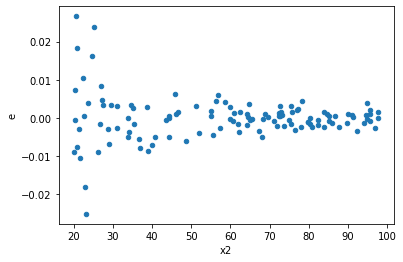

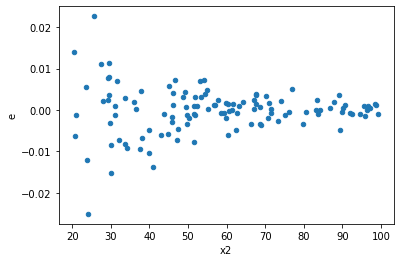

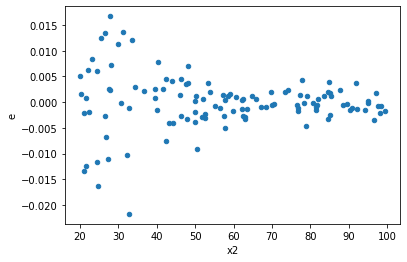

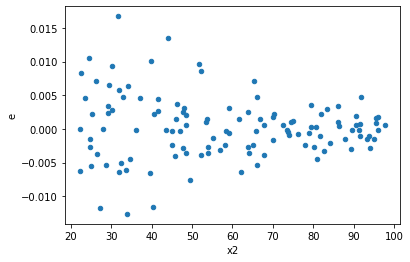

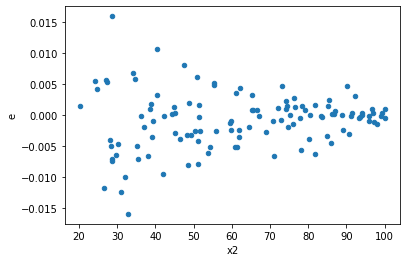

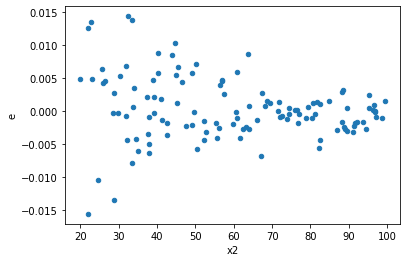

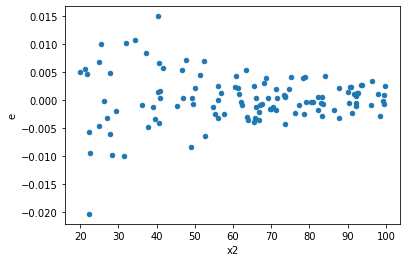

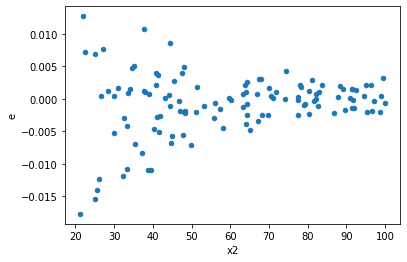

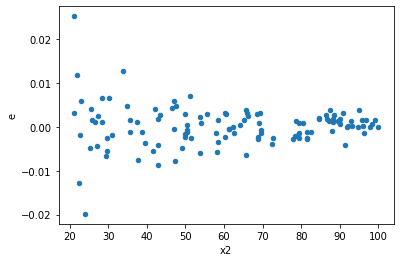

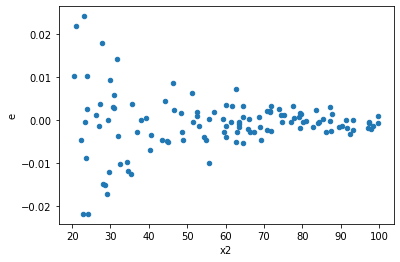

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0021116834864734644,0.0001412282530142439,4.692629969941032e-05,3.1384056225387538e-06,0.06687946082776672,9.518067487026214e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.001996723803265458,0.00024553106705230534,4.4371640072565736e-05,5.456245934495674e-06,0.12296696551158545,9.432345367844185e-11,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0015405131620196842,0.00015967620422219453,3.423362582265965e-05,3.548360093826545e-06,0.10365130799197562,4.245944585976535e-12,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.002910694482571421,0.0001825810259478699,6.468209961269825e-05,4.057356132174887e-06,0.06272765040821829,2.661117172136225e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.003661805038658544,0.00014923816664312687,8.13734453035232e-05,3.316403703180597e-06,0.04075535564225406,3.9951554878808094e-20,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.005042539311503251,0.0001628706099406254,0.00011205642914451669,3.6193468875694532e-06,0.03229932378892479,3.0315717012442625e-22,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0017927085500921013,0.00018882897398232013,3.983796777982447e-05,4.196199421829336e-06,0.10533166362854628,5.7117589600719665e-12,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.002961386672583611,0.00021389241013428567,6.580859272408024e-05,4.7531646696507925e-06,0.07222711310025547,4.3342725524366774e-15,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.003512568990268518,0.0002869668609550783,7.805708867263373e-05,6.377041354557296e-06,0.08169714580698988,4.750910374048966e-14,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64